# Irisデータセットの取得

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
X = data.iloc[:, 2:]
X.head(3)

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


# 無相関化

観測データの特徴間から相関を無くす処理を無相関化といいます。  

#### 無相関化する手順
$1.$ データ $x$ の共分散行列 $\Sigma$ を求める  
$2.$ 求めた共分散行列 $\Sigma$ から固有値、固有ベクトルを取得する  
$3.$ 固有値ベクトルを並べた行列 $S$ (回転行列) を定義する  
$4.$ 回転行列 $S$ を用いてデータ $x$ を線形変換する

In [2]:
# 共分散行列を求める
Sigma = np.cov(X, rowvar=0)

# 共分散行列から固有値、固有ベクトルを取得
eigenvalue, eigenvector = np.linalg.eig(Sigma)

# 固有値ベクトルを並べて回転行列Sを定義する
S = eigenvector

# 回転行列Sを使ってデータを線形変換する
y = np.dot(S.T, X.T).T

#### 参考  
共分散行列 $\Sigma$ を回転行列 $S$ で対角化したものを対角行列 $\Lambda$ とします。この対角行列 $\Lambda$ の分散は、各固有ベクトル方向に対応する固有値になります。また、共分散は $0$ になるので、これを観測データの無相関化といいます。

In [3]:
# 共分散行列を対角化する
Lambda = np.dot(np.dot(S.T, Sigma), S)

# 分散が固有値、共分散が0になっていることを確認する
print('固有値:', eigenvalue)
print('対角行列:\n', Lambda)

固有値: [3.65937449 0.03621925]
対角行列:
 [[3.65937449e+00 0.00000000e+00]
 [6.24500451e-17 3.62192472e-02]]


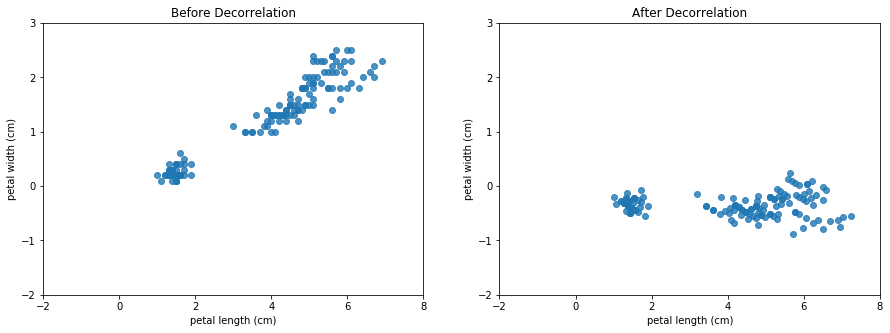

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 2, 1)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=.8)
ax.set_title('Before Decorrelation')
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')
ax.set_xlim((-2, 8))
ax.set_ylim((-2, 3))

ax = fig.add_subplot(1, 2, 2)
ax.scatter(y[:, 0], y[:, 1], alpha=.8)
ax.set_title('After Decorrelation')
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')
ax.set_xlim((-2, 8))
ax.set_ylim((-2, 3))

plt.show()